![](https://www.mapfre.com.tr/blog/media/2022/01/fitness-nedir-1.jpg)



Bu veri seti, spor salonu üyelerinin egzersiz rutinleri, fiziksel özellikleri ve kondisyon ölçümleri hakkında ayrıntılı bir genel bakış sağlar. Kalp atış hızı, yakılan kalori ve egzersiz süresi gibi temel performans göstergeleri de dahil olmak üzere 973 spor salonu verisi örneği içerir. Her giriş aynı zamanda demografik verileri ve deneyim düzeylerini de içerir; bu da fitness kalıplarının, sporcu ilerlemesinin ve sağlık eğilimlerinin kapsamlı analizine olanak tanır.


Github Hesabım:https://github.com/MahirEmre

# Değişkenler
* Age: Spor salonu üyesinin yaşı.
* Gender: Spor salonu üyesinin cinsiyeti (Erkek veya Kadın).
* Weightık (kg): Üyenin kilogram cinsinden ağırlığı.
* Heightlik (m): Üyenin metre cinsinden yüksekliği.
* Max_BPM: Egzersiz seansları sırasında maksimum kalp atış hızı (dakika başına atış). 
* Avg_BPM: Egzersiz seansları sırasında ortalama kalp atış hızı.
* Resting_BPM: Antrenmandan önce dinlenme halindeki kalp atış hızı.
* Session_Duration (saat): Her egzersiz seansının saat cinsinden süresi.
* Calories_Burned: Her seansta yakılan toplam kalori.
* Workout_Type: Gerçekleştirilen antrenmanın türü (ör. Kardiyo, Güç, Yoga, HIIT).
* Fat_Percentage: Üyenin vücut yağ yüzdesi.
* Water_Intake (litre): Egzersizler sırasında günlük sualımı.
* Workout_Frequency (gün/hafta): Haftalık egzersiz seans sayısı.
* Experience_Level: Başlangıçtan (1) uzmana (3) kadar deneyim düzeyi.
* BMI: Boy ve kilodan hesaplanan Beden Kitle Endeksi.

# 0. Veri Setinin Hazırlanması

**Veri Seti ve Adresi:**

Gym Members Exercise Dataset https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

In [1]:
# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv(filepath_or_buffer ="/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv")
df = df_.copy()

In [5]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

# 1. Veriye İlk Bakış

In [6]:
# Veri setinin ilk 3 gözlemini görelim.
df.head(n = 3)

# Sondan 3 gözlem için tail() metodu kullanılabilir.
# df.tail(3)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56.0,Male,88.3,1.71,NaN,157.0,60.0,1.69,1313.0,NaN,12.6,3.5,4.0,3.0,30.20
1,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,NaN,HIIT,33.9,2.1,4.0,2.0,32.00
2,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,33.4,2.3,4.0,2.0,24.71


Veri setindeki satır ve sütun sayılarını .shape kullanarak görebiliriz.

In [7]:
df.shape # -> (satır, sütun)

(973, 15)

Veri setindeki değişkenlerin isimlerine erişmek istersek df.columns kullanabiliriz.

In [8]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'] 

Veri seti içerisinde toplam 15 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



info() metodunu kullanarak, veri setine ait yapısal bilgilere ulaşabiliriz.

Bu noktada elimizde kolonların veri tiplerinin doğru olup olmadığını, kayıt sayılarını, kolon isimlerini mutlaka kontrol etmeliyiz.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            954 non-null    float64
 1   Gender                         939 non-null    object 
 2   Weight (kg)                    940 non-null    float64
 3   Height (m)                     941 non-null    float64
 4   Max_BPM                        946 non-null    float64
 5   Avg_BPM                        950 non-null    float64
 6   Resting_BPM                    942 non-null    float64
 7   Session_Duration (hours)       948 non-null    float64
 8   Calories_Burned                949 non-null    float64
 9   Workout_Type                   949 non-null    object 
 10  Fat_Percentage                 940 non-null    float64
 11  Water_Intake (liters)          940 non-null    float64
 12  Workout_Frequency (days/week)  945 non-null    flo

Sadece elimizdeki değişkenleri görmek ve tiplerini görüntülemek istersek, dtypes kullanabiliriz.


In [10]:
df.dtypes

Age                              float64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                          float64
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
dtype: object

Elimizdeki veri setinde kategorik ve numerik özellikler birlikte bulunmakta. Bu özellikleri ayırmak ve farklı değişken listelerinde kullanmak bizim için faydalı olabilir, özellikle kolon bazlı işlemler yapmak istersek bu listeleri bir filtre olarak kullanabiliriz.

In [12]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [13]:
categorical_features, numerical_features

(['Gender', 'Workout_Type'],
 ['Age',
  'Weight (kg)',
  'Height (m)',
  'Max_BPM',
  'Avg_BPM',
  'Resting_BPM',
  'Session_Duration (hours)',
  'Calories_Burned',
  'Fat_Percentage',
  'Water_Intake (liters)',
  'Workout_Frequency (days/week)',
  'Experience_Level',
  'BMI'])

In [15]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            954 non-null    float64 
 1   Gender                         939 non-null    category
 2   Weight (kg)                    940 non-null    float64 
 3   Height (m)                     941 non-null    float64 
 4   Max_BPM                        946 non-null    float64 
 5   Avg_BPM                        950 non-null    float64 
 6   Resting_BPM                    942 non-null    float64 
 7   Session_Duration (hours)       948 non-null    float64 
 8   Calories_Burned                949 non-null    float64 
 9   Workout_Type                   949 non-null    category
 10  Fat_Percentage                 940 non-null    float64 
 11  Water_Intake (liters)          940 non-null    float64 
 12  Workout_Frequency (days/week)  945 n

In [17]:
df['Workout_Type'][:3]

0       NaN
1      HIIT
2    Cardio
Name: Workout_Type, dtype: category
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']

Veri setimizin betimsel istatistiklerine ulaşmak için describe() fonksiyonunu kullanıyoruz.

Bu fonksiyon eksik verileri göz ardı eder ve default olarak yalnızca numerik değişkenlere bakar.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,954.0,38.647799,12.201081,18.00,28.00,39.00,49.00,59.00
Weight (kg),940.0,73.890851,21.183469,40.00,58.10,70.15,86.10,129.90
Height (m),941.0,1.723348,0.127691,1.50,1.62,1.71,1.80,2.00
Max_BPM,946.0,179.946089,11.545459,160.00,170.00,180.00,190.00,199.00
Avg_BPM,950.0,143.815789,14.318769,120.00,131.00,143.00,156.00,169.00
Resting_BPM,942.0,62.129512,7.336616,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),948.0,1.254747,0.344465,0.50,1.04,1.26,1.46,2.00
Calories_Burned,949.0,904.682824,274.318210,303.00,719.00,891.00,1076.00,1783.00
Fat_Percentage,940.0,25.010638,6.246902,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),940.0,2.628830,0.601674,1.50,2.20,2.60,3.10,3.70


# 2. Eksik Veri Analizi

**2.1 Eksik Verilerin Gözlemlenmesi**

In [19]:
df.isna().sum()

Age                              19
Gender                           34
Weight (kg)                      33
Height (m)                       32
Max_BPM                          27
Avg_BPM                          23
Resting_BPM                      31
Session_Duration (hours)         25
Calories_Burned                  24
Workout_Type                     24
Fat_Percentage                   33
Water_Intake (liters)            33
Workout_Frequency (days/week)    28
Experience_Level                 30
BMI                              32
dtype: int64

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz

In [20]:
df.isna().sum().sum()

428

In [21]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

Age                              954
Gender                           939
Weight (kg)                      940
Height (m)                       941
Max_BPM                          946
Avg_BPM                          950
Resting_BPM                      942
Session_Duration (hours)         948
Calories_Burned                  949
Workout_Type                     949
Fat_Percentage                   940
Water_Intake (liters)            940
Workout_Frequency (days/week)    945
Experience_Level                 943
BMI                              941
dtype: int64

In [22]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 14167 adet eksik olmayan, 428 eksik gözlem var.


In [23]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56.0,Male,88.3,1.71,NaN,157.0,60.0,1.69,1313.0,NaN,12.6,3.5,4.0,3.0,30.20
1,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,NaN,HIIT,33.9,2.1,4.0,2.0,32.00
3,25.0,Male,53.2,1.70,190.0,NaN,56.0,0.59,532.0,Strength,28.8,NaN,3.0,1.0,18.41
6,36.0,Male,70.3,1.72,174.0,169.0,73.0,1.49,1385.0,Cardio,21.3,2.3,NaN,2.0,23.76
7,40.0,NaN,69.7,1.51,189.0,141.0,64.0,1.27,895.0,Cardio,30.6,1.9,3.0,2.0,30.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,56.0,Female,64.2,1.69,190.0,137.0,61.0,1.99,1227.0,Cardio,19.6,2.7,5.0,3.0,NaN
965,23.0,Female,44.1,1.62,196.0,122.0,58.0,0.58,354.0,NaN,25.7,2.7,2.0,1.0,16.80
967,20.0,Male,55.0,1.60,172.0,168.0,67.0,1.12,1035.0,Yoga,24.0,3.2,4.0,2.0,NaN
969,25.0,Male,66.6,1.61,184.0,166.0,56.0,1.38,NaN,Strength,25.0,3.0,2.0,1.0,25.69


In [24]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
2,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,33.4,2.3,4.0,2.0,24.71
4,38.0,Male,46.1,1.79,188.0,158.0,68.0,0.64,556.0,Strength,29.2,2.8,3.0,1.0,14.39
5,56.0,Female,58.0,1.68,168.0,156.0,74.0,1.59,1116.0,HIIT,15.5,2.7,5.0,3.0,20.55
8,28.0,Male,121.7,1.94,185.0,127.0,52.0,1.03,719.0,Strength,28.9,2.6,4.0,2.0,32.34
10,41.0,Male,120.8,1.67,188.0,146.0,54.0,0.82,593.0,HIIT,20.5,3.0,2.0,1.0,43.31


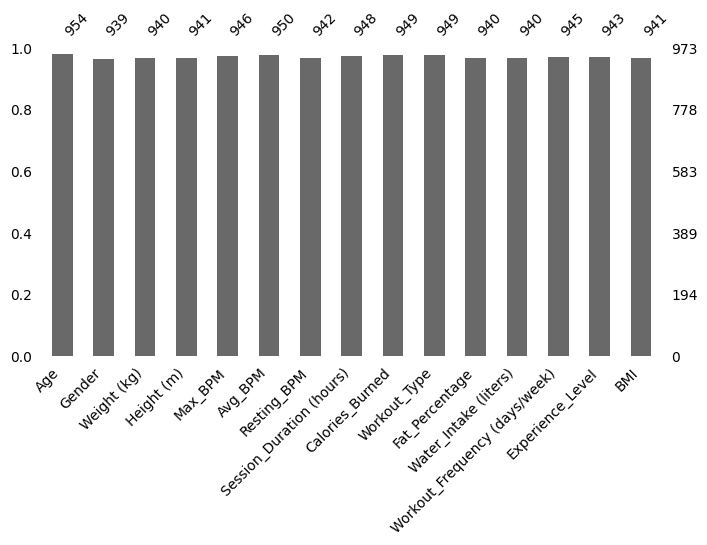

In [25]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

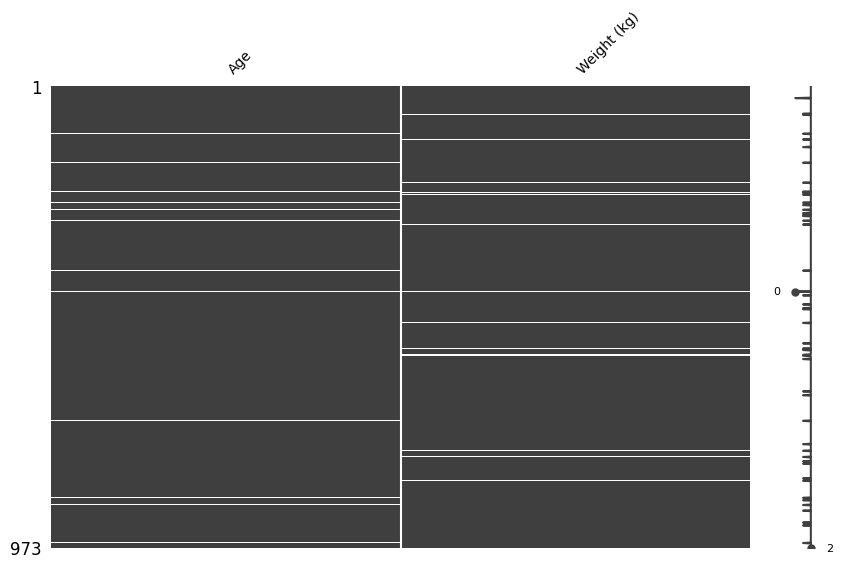

In [26]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['Age', 'Weight (kg)']],
            figsize = (10, 6),
            fontsize = 10);

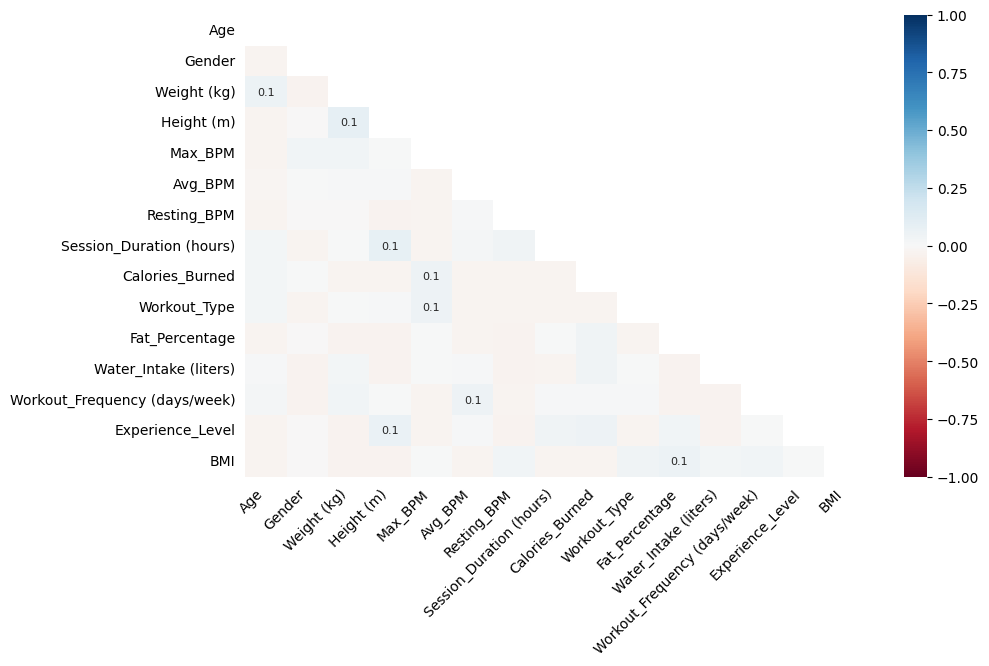

In [27]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

**2.2 Eksik Verilerin Silinmesi**

In [28]:
# Eksik verilerin dropna ile silinmesi.
df.dropna(inplace = False)[:5]
#df = df.dropna()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
2,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,33.4,2.3,4.0,2.0,24.71
4,38.0,Male,46.1,1.79,188.0,158.0,68.0,0.64,556.0,Strength,29.2,2.8,3.0,1.0,14.39
5,56.0,Female,58.0,1.68,168.0,156.0,74.0,1.59,1116.0,HIIT,15.5,2.7,5.0,3.0,20.55
8,28.0,Male,121.7,1.94,185.0,127.0,52.0,1.03,719.0,Strength,28.9,2.6,4.0,2.0,32.34
10,41.0,Male,120.8,1.67,188.0,146.0,54.0,0.82,593.0,HIIT,20.5,3.0,2.0,1.0,43.31


In [29]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56.0,Male,88.3,1.71,NaN,157.0,60.0,1.69,1313.0,NaN,12.6,3.5,4.0,3.0,30.20
1,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,NaN,HIIT,33.9,2.1,4.0,2.0,32.00
2,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,33.4,2.3,4.0,2.0,24.71
3,25.0,Male,53.2,1.70,190.0,NaN,56.0,0.59,532.0,Strength,28.8,NaN,3.0,1.0,18.41
4,38.0,Male,46.1,1.79,188.0,158.0,68.0,0.64,556.0,Strength,29.2,2.8,3.0,1.0,14.39


In [30]:
# Değişken bazında silmek için;
df.dropna(axis = 1)

""
0
1
2
3
4
...
968
969
970
971


**2.3 Eksik Verilerin Doldurulması**

In [31]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56.0,Male,88.3,1.71,NaN,157.0,60.0,1.69,1313.0,NaN,12.6,3.5,4.0,3.0,30.20
1,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,NaN,HIIT,33.9,2.1,4.0,2.0,32.00
2,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,33.4,2.3,4.0,2.0,24.71


In [32]:
df_fillna.isna().sum()

Age                              19
Gender                           34
Weight (kg)                      33
Height (m)                       32
Max_BPM                          27
Avg_BPM                          23
Resting_BPM                      31
Session_Duration (hours)         25
Calories_Burned                  24
Workout_Type                     24
Fat_Percentage                   33
Water_Intake (liters)            33
Workout_Frequency (days/week)    28
Experience_Level                 30
BMI                              32
dtype: int64

**2.3.1. Sayısal Değişkenlerin Doldurulması**

In [33]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_salary = df_fillna['Calories_Burned'].mean()

df_fillna['Calories_Burned'].fillna(value = mean_salary, inplace = True)

df_fillna.isna().sum()

/tmp/ipykernel_24/296868053.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Calories_Burned'].fillna(value = mean_salary, inplace = True)


Age                              19
Gender                           34
Weight (kg)                      33
Height (m)                       32
Max_BPM                          27
Avg_BPM                          23
Resting_BPM                      31
Session_Duration (hours)         25
Calories_Burned                   0
Workout_Type                     24
Fat_Percentage                   33
Water_Intake (liters)            33
Workout_Frequency (days/week)    28
Experience_Level                 30
BMI                              32
dtype: int64

In [34]:
# Doldurma işleminin döngüyle yapılması
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

/tmp/ipykernel_24/2093098731.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[col].fillna(df[col].mean(), inplace = True)


In [35]:
df_fillna.isna().sum()


Age                              19
Gender                           34
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                     24
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
dtype: int64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,954.0,38.647799,12.201081,18.00,28.00,39.00,49.00,59.00
Weight (kg),940.0,73.890851,21.183469,40.00,58.10,70.15,86.10,129.90
Height (m),941.0,1.723348,0.127691,1.50,1.62,1.71,1.80,2.00
Max_BPM,946.0,179.946089,11.545459,160.00,170.00,180.00,190.00,199.00
Avg_BPM,950.0,143.815789,14.318769,120.00,131.00,143.00,156.00,169.00
Resting_BPM,942.0,62.129512,7.336616,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),948.0,1.254747,0.344465,0.50,1.04,1.26,1.46,2.00
Calories_Burned,949.0,904.682824,274.318210,303.00,719.00,891.00,1076.00,1783.00
Fat_Percentage,940.0,25.010638,6.246902,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),940.0,2.628830,0.601674,1.50,2.20,2.60,3.10,3.70


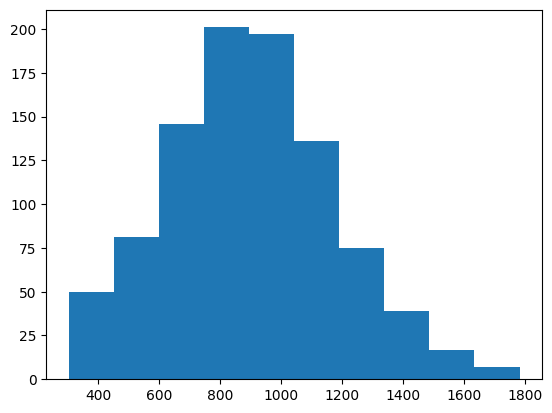

In [37]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['Calories_Burned'])
plt.show()

**2.3.2. Kategorik Değişkenlerin Doldurulması**

In [39]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Gender'].isna().sum()

# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Gender'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['Gender'] = df_fillna['Gender'].fillna(value = work_setting_mode[0])

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

Age                              19
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                     24
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
dtype: int64

In [40]:
df_fillna[["Workout_Type"]][:20]

,Workout_Type
0,NaN
1,HIIT
2,Cardio
3,Strength
4,Strength
5,HIIT
6,Cardio
7,Cardio
8,Strength
9,Cardio


In [41]:
# Önceki değer ile doldurma işlemi
df_fillna["Workout_Type"].fillna(method = "bfill")

/tmp/ipykernel_24/1859403330.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["Workout_Type"].fillna(method = "bfill")


0          HIIT
1          HIIT
2        Cardio
3      Strength
4      Strength
         ...   
968    Strength
969    Strength
970      Cardio
971        HIIT
972    Strength
Name: Workout_Type, Length: 973, dtype: category
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']

In [42]:
# Sonraki değer ile doldurma işlemi
df_fillna["Workout_Type"].fillna(method = "ffill")


/tmp/ipykernel_24/2914392273.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["Workout_Type"].fillna(method = "ffill")


0           NaN
1          HIIT
2        Cardio
3      Strength
4      Strength
         ...   
968    Strength
969    Strength
970      Cardio
971        HIIT
972    Strength
Name: Workout_Type, Length: 973, dtype: category
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']

**2.3.3. Kategorik Kırılımla Doldurma İşlemi**

In [43]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

Age                              19
Gender                           34
Weight (kg)                      33
Height (m)                       32
Max_BPM                          27
Avg_BPM                          23
Resting_BPM                      31
Session_Duration (hours)         25
Calories_Burned                  24
Workout_Type                     24
Fat_Percentage                   33
Water_Intake (liters)            33
Workout_Frequency (days/week)    28
Experience_Level                 30
BMI                              32
dtype: int64

In [46]:
df_categorical_fillna[df_categorical_fillna[["Gender", "Weight (kg)"]].isna().all(axis=1)][["Gender", "Weight (kg)"]]

,Gender,Weight (kg)


In [47]:
df_categorical_fillna[df_categorical_fillna['Weight (kg)'].isnull()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
25,NaN,Female,NaN,1.71,173.0,169.0,62.0,1.42,1080.0,Yoga,26.1,NaN,3.0,2.0,21.78
60,43.0,Female,NaN,NaN,179.0,124.0,54.0,1.04,580.0,Strength,26.4,2.6,3.0,2.0,22.45
112,52.0,Male,NaN,1.82,174.0,154.0,57.0,1.78,1357.0,Yoga,14.9,3.5,4.0,3.0,25.81
128,59.0,Male,NaN,1.89,178.0,153.0,51.0,0.66,500.0,Yoga,20.1,3.1,3.0,1.0,34.24
203,51.0,Female,NaN,1.77,177.0,123.0,72.0,1.08,598.0,Yoga,31.6,NaN,4.0,2.0,18.32
224,50.0,Male,NaN,1.72,188.0,125.0,62.0,1.46,903.0,Strength,25.7,2.7,3.0,2.0,32.69
228,57.0,Female,NaN,1.56,168.0,138.0,68.0,1.45,900.0,HIIT,29.1,1.6,4.0,2.0,28.15
250,36.0,Male,NaN,1.99,189.0,NaN,73.0,NaN,1075.0,Yoga,20.9,2.5,3.0,1.0,25.23
267,46.0,Female,NaN,NaN,180.0,155.0,53.0,1.52,1060.0,Strength,17.1,2.7,4.0,3.0,20.38
271,52.0,Male,NaN,1.62,189.0,141.0,NaN,1.36,949.0,HIIT,27.6,3.2,3.0,1.0,40.09


# 3. Kategorik Değişken Analizi

In [48]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

**3.1 Kategorik Değişken İşlemleri**

In [49]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio


In [50]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["Workout_Type"].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [51]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 2 unique values in "Gender" categorical feature.

There are 4 unique values in "Workout_Type" categorical feature.



In [52]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

Gender
Male      511
Female    462
Name: count, dtype: int64
 *********************************************
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64
 *********************************************


In [53]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["Gender"].unique().tolist()[::-1]
comp_categories

['Female', 'Male']

In [55]:
# Ordinal değişken nasıl oluşturulur?
from pandas.api.types import CategoricalDtype

df["Gender"] = df["Gender"].astype(CategoricalDtype(categories = comp_categories, ordered = True))


In [56]:
df["Gender"].head()

0      Male
1    Female
2    Female
3      Male
4      Male
Name: Gender, dtype: category
Categories (2, object): ['Female' < 'Male']

**3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri**

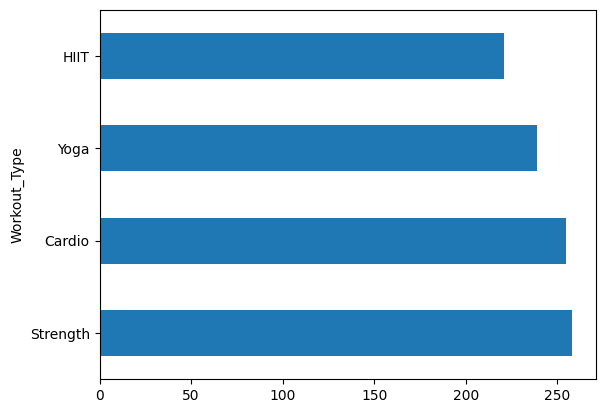

In [57]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['Workout_Type'].value_counts().plot.barh();

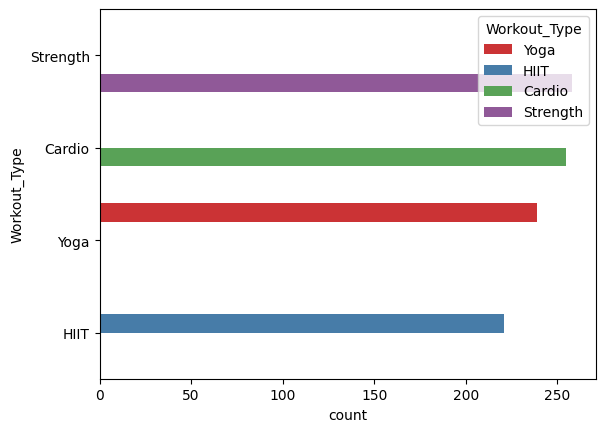

In [58]:
sns.countplot(data = df,
              y = "Workout_Type",
              hue = "Workout_Type",
              order = df["Workout_Type"].value_counts().index,
              palette = "Set1");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


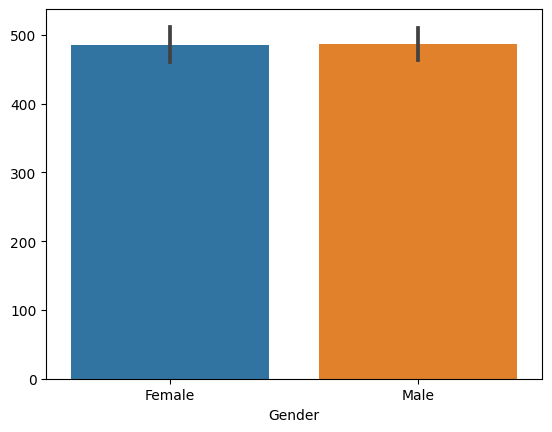

In [61]:
sns.barplot(data = df, x = "Gender", y = df.Gender.index);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


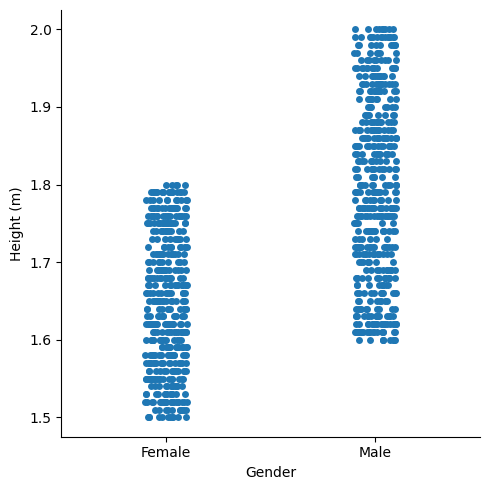

In [62]:
sns.catplot(data = df,
            x = "Gender",
            y = "Height (m)");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


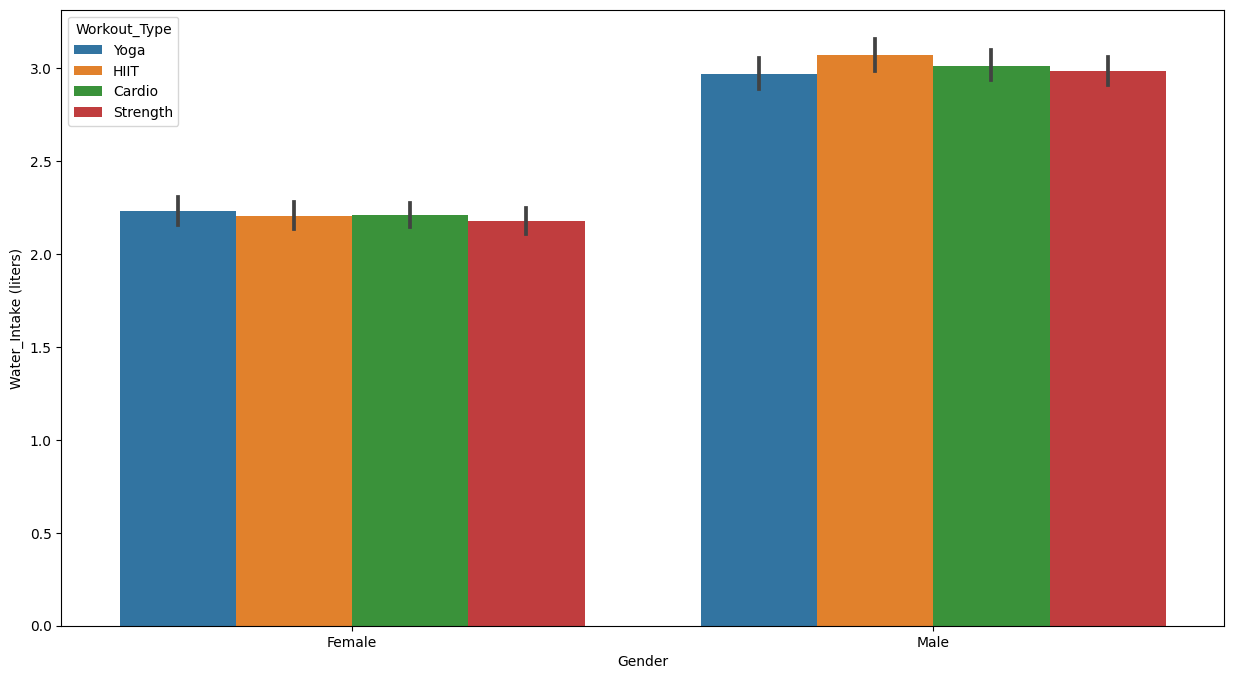

In [64]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "Gender",
            y = "Water_Intake (liters)",
            hue = "Workout_Type");

**3.3 Kategorik Gruplama (groupby) İşlemleri**

In [66]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Soru: En çok kalori yakan antrenman türü hangisidir?

In [68]:
df_usd = df.groupby(by = "Workout_Type")["Calories_Burned"].mean().to_frame().reset_index().sort_values(by = "Calories_Burned", ascending = False)

df_usd

,Workout_Type,Calories_Burned
1,HIIT,925.805430
2,Strength,910.697674
3,Yoga,903.188285
0,Cardio,884.513725


In [70]:
df.groupby(by = ['Workout_Type', 'Session_Duration (hours)'])['Calories_Burned'].mean().to_frame().reset_index().sort_values(by = "Calories_Burned", ascending = False)[:5]

,Workout_Type,Session_Duration (hours),Calories_Burned
216,HIIT,1.93,1688.0
328,Strength,2.00,1634.0
113,Cardio,1.97,1625.0
219,HIIT,1.99,1587.0
325,Strength,1.96,1585.0


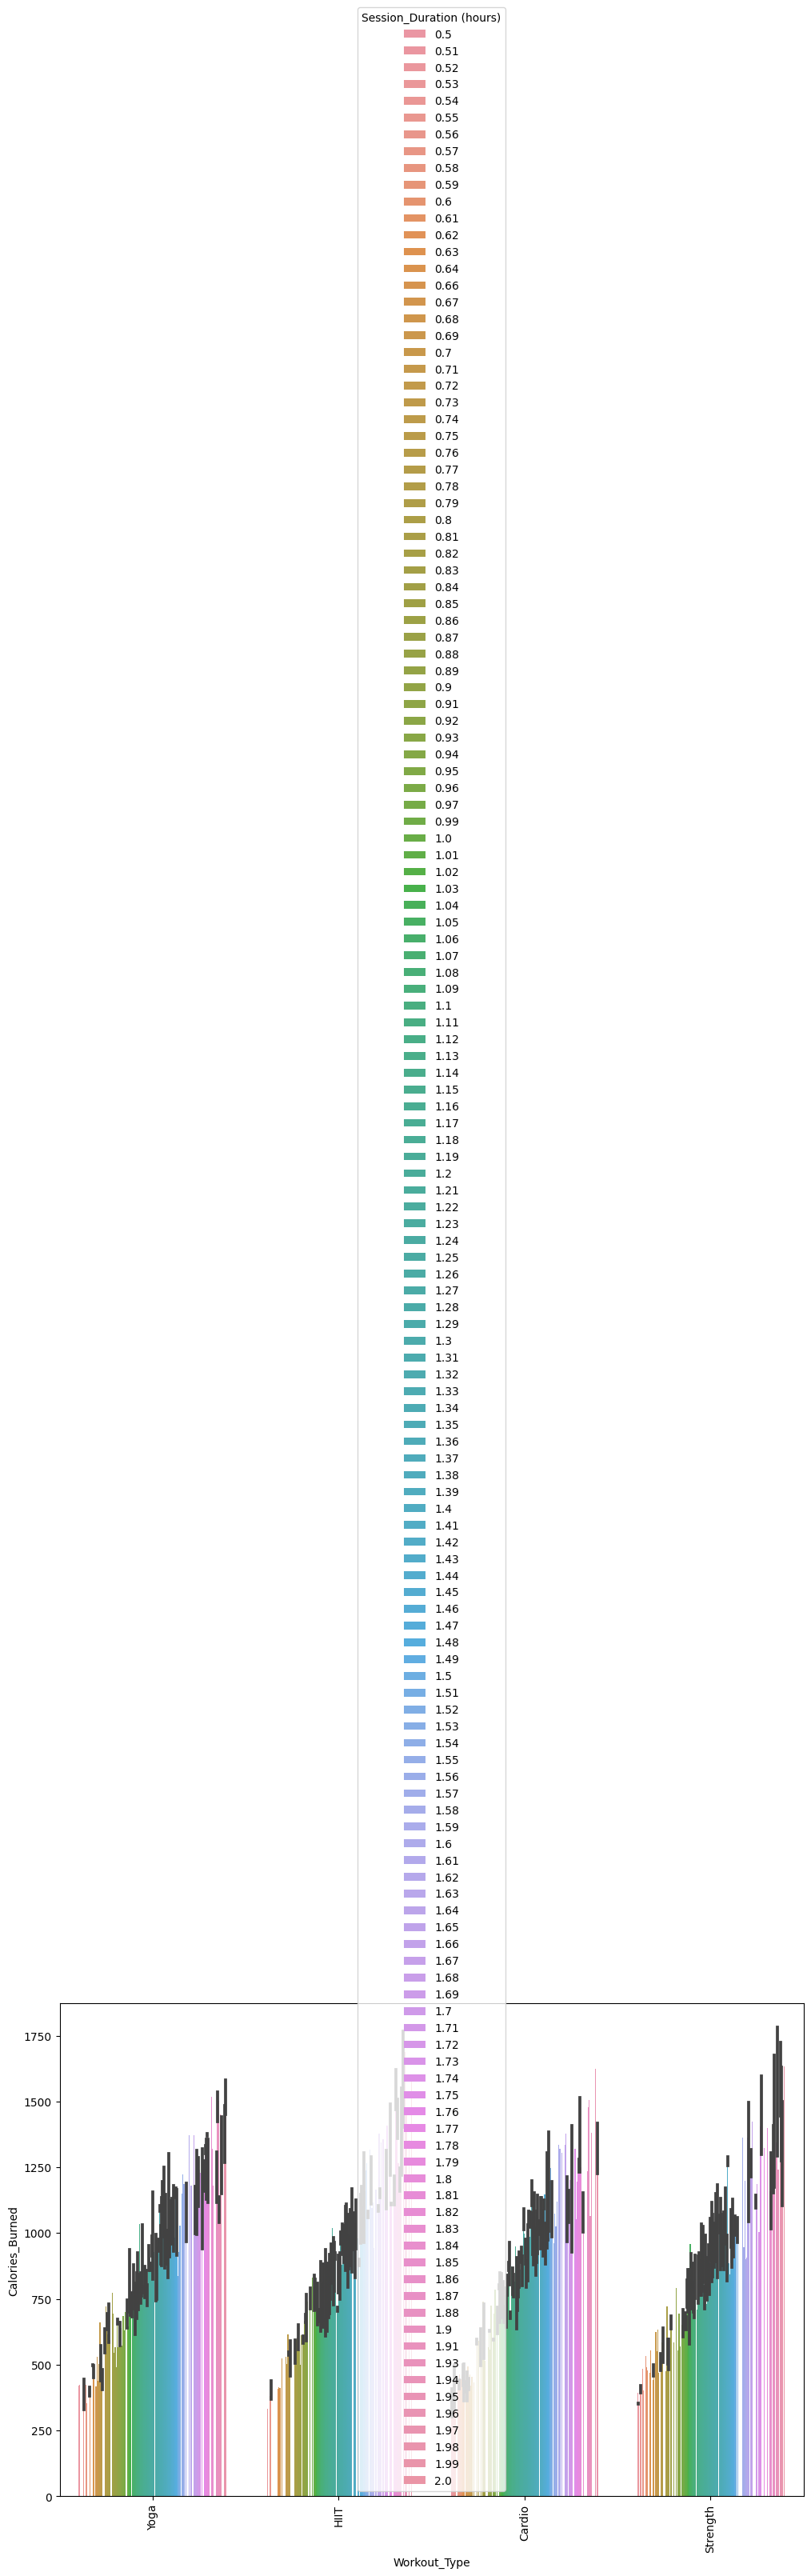

In [71]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "Workout_Type", y = "Calories_Burned", hue = "Session_Duration (hours)");

Soru: Hangi cinsiyetteki üyelerde vücut yağ yüzdesi daha yüksek?

In [72]:
# Cinsiyete göre vücut yağ yüzdesi ortalamasını hesapla
df_gender_fat = df.groupby(by="Gender")["Fat_Percentage"].mean().reset_index()

# Sonuçları büyükten küçüğe sırala
df_gender_fat = df_gender_fat.sort_values(by="Fat_Percentage", ascending=False)

print(df_gender_fat)


   Gender  Fat_Percentage
0  Female       27.656710
1    Male       22.553816


/tmp/ipykernel_24/3841511087.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gender_fat = df.groupby(by="Gender")["Fat_Percentage"].mean().reset_index()


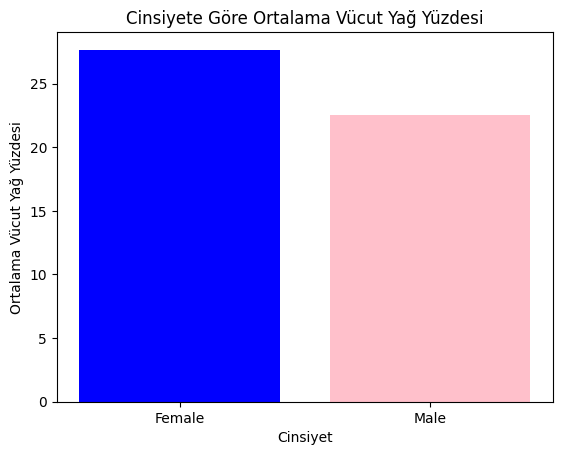

In [73]:
# Bar grafiği oluştur
plt.bar(df_gender_fat["Gender"], df_gender_fat["Fat_Percentage"], color=['blue', 'pink'])
plt.xlabel("Cinsiyet")
plt.ylabel("Ortalama Vücut Yağ Yüzdesi")
plt.title("Cinsiyete Göre Ortalama Vücut Yağ Yüzdesi")
plt.show()

# 4. Sürekli Değişken Analizi

**4.1 Sürekli Değişkenlerin İncelenmesi**

In [74]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39


In [75]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [76]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [77]:
give_stats(dataframe = df)

**********Age**********
Mean value of Age is 38.68
Std value of Age is 12.18
Max value of Age is 59
Min value of Age is 18
Count value of Age is 973
Median value of Age is 40.0

**********Weight (kg)**********
Mean value of Weight (kg) is 73.85
Std value of Weight (kg) is 21.21
Max value of Weight (kg) is 129.9
Min value of Weight (kg) is 40.0
Count value of Weight (kg) is 973
Median value of Weight (kg) is 70.0

**********Height (m)**********
Mean value of Height (m) is 1.72
Std value of Height (m) is 0.13
Max value of Height (m) is 2.0
Min value of Height (m) is 1.5
Count value of Height (m) is 973
Median value of Height (m) is 1.71

**********Max_BPM**********
Mean value of Max_BPM is 179.88
Std value of Max_BPM is 11.53
Max value of Max_BPM is 199
Min value of Max_BPM is 160
Count value of Max_BPM is 973
Median value of Max_BPM is 180.0

**********Avg_BPM**********
Mean value of Avg_BPM is 143.77
Std value of Avg_BPM is 14.35
Max value of Avg_BPM is 169
Min value of Avg_BPM is 120


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

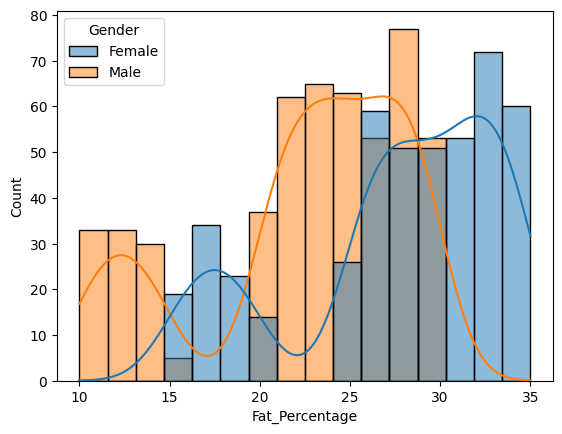

In [86]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "Fat_Percentage", kde = True, hue = "Gender");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


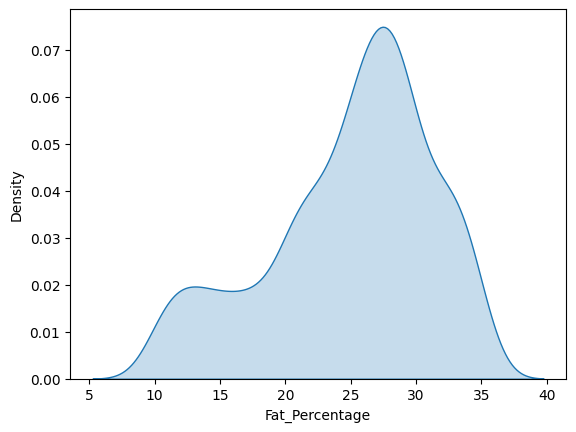

In [87]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['Fat_Percentage'], fill = True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


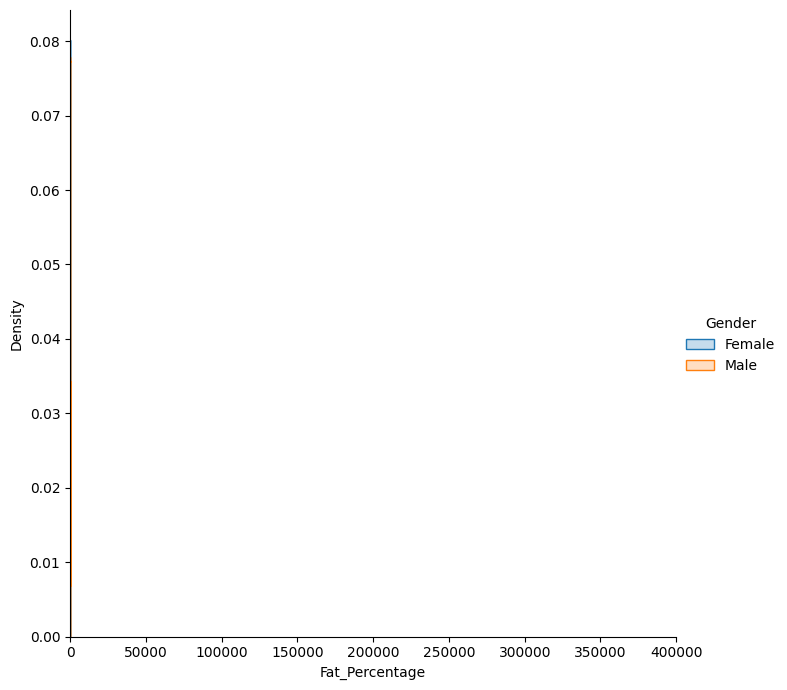

In [88]:
# FacetGrid kullanarak kategorik kırılımda yoğunluk gözlemleyebiliriz.
sns.FacetGrid(data = df,
              hue = "Gender",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "Fat_Percentage", fill = True).add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

<Figure size 1200x800 with 0 Axes>

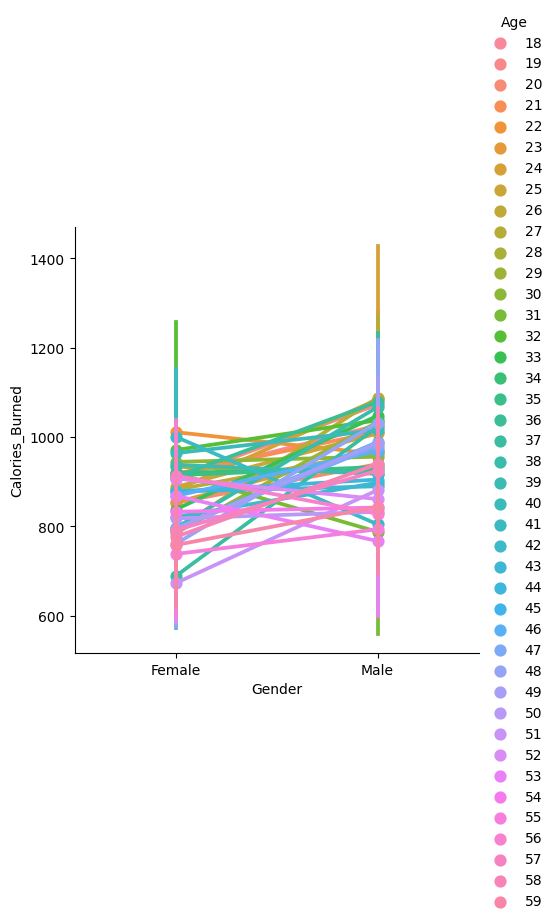

In [89]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = "Gender", y = "Calories_Burned", hue = "Age", kind = "point");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


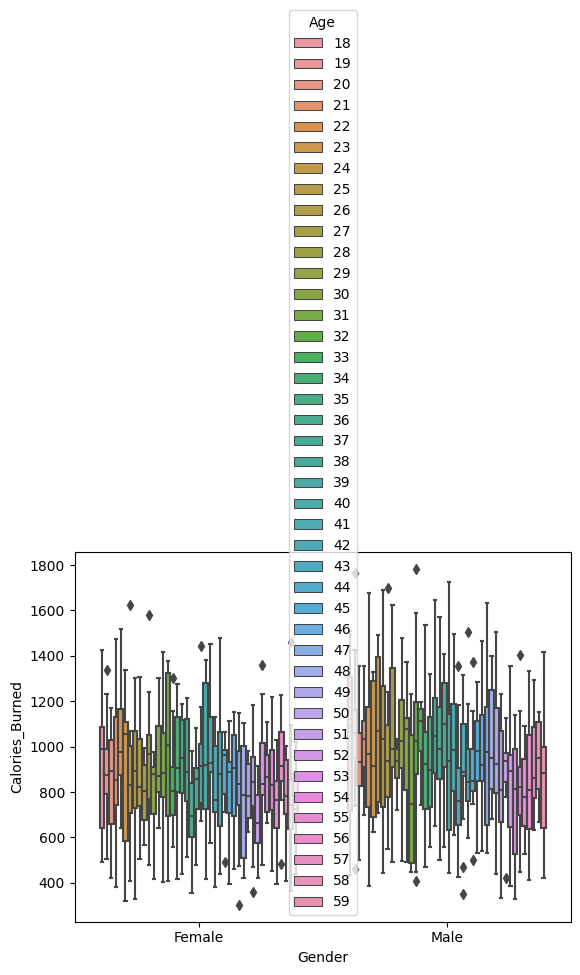

In [90]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = df,
            x = "Gender",
            y = "Calories_Burned",
            hue = "Age");

In [91]:
# Farklı numerik görselleştirme işlemleri için iris veri setini yükleyelim.
iris = sns.load_dataset(name = "iris")
iris[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

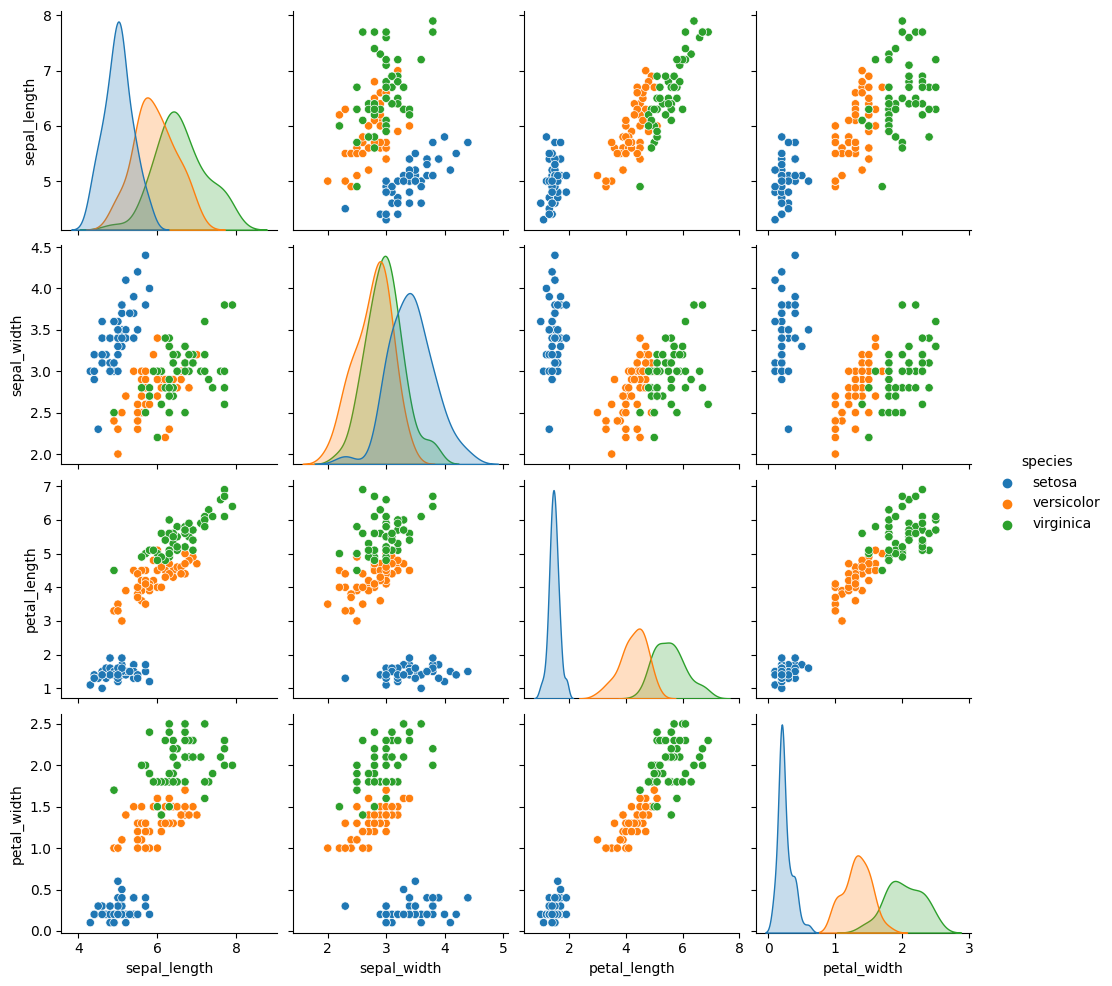

In [95]:
# pairplot numerik değişkenler arasındaki saçılım ve yoğunluk ilişkilerini gösterir.
sns.pairplot(data = iris, hue = "species");

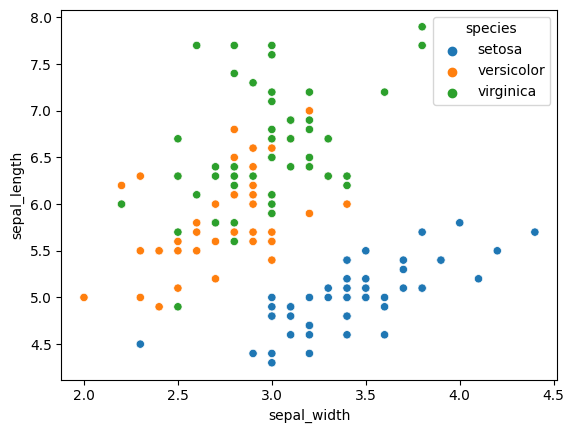

In [96]:
# Scatter Plot, numerik değişkenler arasındaki saçılım ilişkisini gösterir.
sns.scatterplot(data = iris,
                x = "sepal_width",
                y = "sepal_length",
                hue = "species");

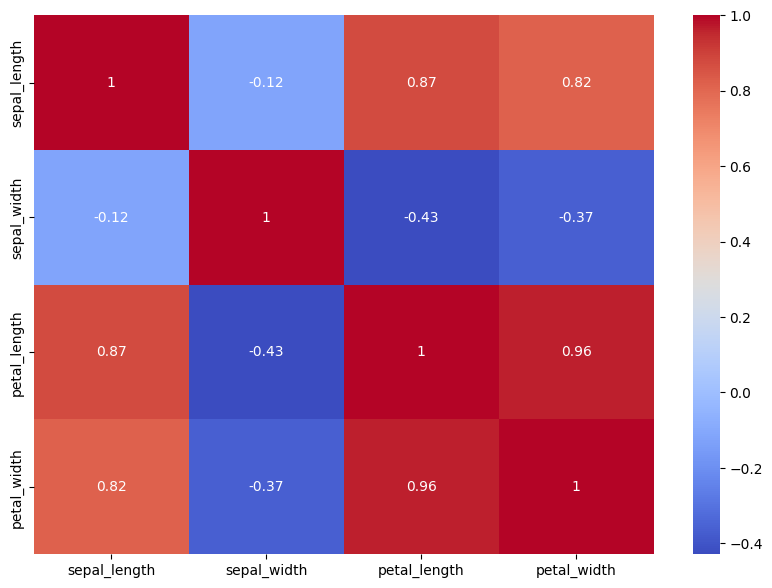

In [97]:
# Heatmap ise corr() (korelasyon) methodu ile kullanıldığında numerik değerler arasındaki ilişki kuvvetini gösterir.
plt.figure(figsize = (10, 7))
sns.heatmap(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot = True, cmap = "coolwarm");